# SOMMAIRE : 
 - <a href="#C1">Import des données</a>
 
**Partie 1 : Nettoyage du jeu de données**
 - <a href="#C2">Nettoyage de mon jeu de données</a>
 - <a href="#C3">Doublons</a>
 - <a href="#C4">Jointure des tables</a>
 
**Partie 2 : Analyse des données**
 - <a href="#C5">Analyse du jeu de données</a>
  - <a href="#C6">Calcul chiffre d'affaire</a>
  - <a href="#C7">Analyse outliers/graphique</a>

# <a name="C1">Import des données</a>

In [1]:
#Import des librairies nécessaire au projet (ajout d'autres librairies si nécessaire ensuite)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import re

In [2]:
#Import des fichiers nécessaire à la réalisation du projet.
liaison = pd.read_excel(r'C:\Users\Jonathan.Gourville\Desktop\P5_donnes\liaison.xlsx')
web = pd.read_excel(r'C:\Users\Jonathan.Gourville\Desktop\P5_donnes\web.xlsx')
erp = pd.read_excel(r'C:\Users\Jonathan.Gourville\Desktop\P5_donnes\erp.xlsx')

C:\Users\Jonathan.Gourville\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Jonathan.Gourville\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Jonathan.Gourville\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


# <a name="C2">P1 - Nettoyage de mon jeu de données</a>

# Liaison

In [3]:
#Changement de la colonne liaison
#remplacer les ref non dispo sur site web par 0
liaison.rename(columns={'id_web':'sku'}, inplace = True)

In [4]:
#information sur le head de la table liaison pour les infos sur les colonnes
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [5]:
#conversion de la colonne product_id en object car c'est un identifiant, ne pas pouvoir faire de manipulation.
liaison['product_id'] = liaison['product_id'].astype(object)

In [6]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    object
 1   sku         734 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


In [7]:
#Affichage uniquement valeur manquantes
nbnul_ma_liaison = liaison.isnull().sum()
nbnul_ma_liaison[nbnul_ma_liaison>0]

sku    91
dtype: int64

In [8]:
#utilisation de la fonction .loc pour voir les valeurs manquantes dans ma table
liaison.loc[liaison['sku'].isnull(),:]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [9]:
#supprimer les lignes avec NaN, non exploitable
liaison = liaison[liaison['sku'].notnull()]

In [10]:
#Affichage pour montrer qu'il n'y a plus de valeurs manquantes
nb_ma_liaison = liaison.isnull().sum()
nb_ma_liaison[nb_ma_liaison>0]

Series([], dtype: int64)

In [11]:
liaison.isnull().sum()

product_id    0
sku           0
dtype: int64

# Web

In [12]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [13]:
#Voir les demandes qui suivent et s'il faut changer les variables au fur et à mesure. supprimer les colonnes ou ligne vide.
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [14]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [15]:
#Suppression des colonnes dont les valeurs sont manquantes
web = web.drop(['tax_class'], axis=1)
web = web.drop(['post_content'], axis =1)
web = web.drop(['post_password'], axis=1)
web = web.drop(['post_content_filtered'], axis=1)

In [16]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
#quand aucunes données, qui apportent rien, supprimer ces données. Suppression de ligne ou colonne,correction de ligne/colonne
web.loc[web['sku'].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#supprimer les lignes avec NaN, non exploitable
#expliquer pourquoi j'ai supprimé, sku est null donc aucun intérêt de les garder pareil pour liaison.
web = web[web['sku'].notnull()]

In [19]:
#Affichage des valeurs manquantes supprimé
web.loc[web['sku'].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [20]:
web.head(10)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,19815,0,0,0,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,15303,0,0,0,0.0,0.0,taxable,2.0,2018-02-12 09:13:35,2018-02-12 08:13:35,...,closed,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,14975,0,0,0,0.0,0.0,taxable,2.0,2018-02-12 09:45:14,2018-02-12 08:45:14,...,closed,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,16042,0,0,0,0.0,7.0,taxable,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,...,closed,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14980,0,0,0,0.0,3.0,taxable,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,...,closed,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# Erp

In [21]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [22]:
#Conversion product_id en object
erp['product_id'] = erp['product_id'].astype(object)

In [23]:
#.info() pour vérifier ma conversion de colonne
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.4+ KB


In [24]:
#Aucune valeurs nulles
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

# <a name="C3">Gestion des doublons</a>

In [25]:
#gestion des unicités / doublons web
#cellule ou tu affiche tes doublons, j'analyse, traite et vverification
#Affichage des doublons
web[web.duplicated(subset=['sku'])] #affichage des doublons
web[web["sku"] == 15298] #verification ou sur un ou plusieurs id
#On peut voir qu'il y a des doublons image/jpeg et product

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [26]:
#traitement des doublons
web = web[web['post_type'] == "product"]#filtre pour garder uniquement les produits

In [27]:
#Vérification
web[web.duplicated(subset=['sku'])] #affichage des doublons
#On peut voir qu'il n'y a plus la ligne image/jpeg

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [28]:
#gestion des doublons liaison
liaison[liaison.duplicated(subset=['product_id'])] #affichage des doublons
#On peut voir que la table ne contient pas de doublons

,product_id,sku


In [29]:
#gestion des doublons de la table erp 
erp[erp.duplicated(subset="product_id")] #affichage des doublons
#on peut constater qu'il n'y a pas de doublons non plus au sein de la table erp.

,product_id,onsale_web,price,stock_quantity,stock_status


# <a name="C4">Jointure des tables</a>

In [30]:
#jointure ERP et liaison
#liaison en inner car le data frame contient que des merge both et les left_only sont inutilisable
erp_liaison = pd.merge(left = erp, right = liaison, how="outer", on=['product_id'], indicator = True)
#verifier en faisant un filtre sur la nouvelle variable _merge, delete cette variable et choisir le bonne jointure.
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,left_only
821,7204,0,45.0,9,instock,NaN,left_only
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [31]:
left_only = erp_liaison.loc[erp_liaison['_merge'] == 'left_only']
print(left_only)

    product_id  onsale_web  price  stock_quantity stock_status  sku     _merge
19        4055           0   86.1               0   outofstock  NaN  left_only
49        4090           0   73.0               0   outofstock  NaN  left_only
50        4092           0   47.0               0   outofstock  NaN  left_only
119       4195           0   14.1               0   outofstock  NaN  left_only
131       4209           0   73.5               0   outofstock  NaN  left_only
..         ...         ...    ...             ...          ...  ...        ...
817       7196           0   31.0              55      instock  NaN  left_only
818       7200           0   31.0               6      instock  NaN  left_only
819       7201           0   31.0              18      instock  NaN  left_only
820       7203           0   45.0              30      instock  NaN  left_only
821       7204           0   45.0               9      instock  NaN  left_only

[91 rows x 7 columns]


In [32]:
left_only.groupby('sku')['sku'].count()

Series([], Name: sku, dtype: int64)

On constate sur la cellule précédente que nous avons des merge = left_only, cela correspond à des produits non vendu sur le web dont nous avons pas besoin, il faut les supprimer, c'est pour cela qu'après la jointure nous avons des lignes en moins après notre jointure. 

In [33]:
erp_liaison =erp_liaison[erp_liaison['_merge'] == "both"]
erp_liaison = erp_liaison.drop(['_merge'], axis = 1) #axis = 1 suppression colonne mais pas ligne
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
792,7023,1,27.5,15,instock,15891
793,7025,1,69.0,2,instock,15887
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [34]:
#Jointure fichier erp/liaison et web
table_total = pd.merge(left = erp_liaison, right = web, how='outer', on=["sku"], indicator = True )
#verifier en faisant un filtre sur la nouvelle variable _merge, delete cette variable et choisir le bonne jointure.
table_total
#table_total['_merge'] == 'left_only'
#Liaison en inner vu qu'il y a que des both. verifier left_only
#table_total = table_total.drop(['_merge'], axis = 1) #axis = 1 suppression colonne mais pas ligne
#table_total['_merge'].unique()
#table_total.iloc[1445]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
730,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
731,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
732,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaN,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [35]:
#On constate dans la colonne merge left_only et et both
table_total.iloc[732]
#les left_only sont unitilisables donc je choisi both

product_id                7329
onsale_web                   0
price                     26.5
stock_quantity              14
stock_status           instock
sku                    14680-1
virtual                    NaN
downloadable               NaN
rating_count               NaN
average_rating             NaN
total_sales                NaN
tax_status                 NaN
post_author                NaN
post_date                  NaT
post_date_gmt              NaT
post_title                 NaN
post_excerpt               NaN
post_status                NaN
comment_status             NaN
ping_status                NaN
post_name                  NaN
post_modified              NaT
post_modified_gmt          NaT
post_parent                NaN
guid                       NaN
menu_order                 NaN
post_type                  NaN
post_mime_type             NaN
comment_count              NaN
_merge               left_only
Name: 732, dtype: object

In [36]:
table_total =table_total[table_total['_merge'] == "both"]
table_total =table_total.drop(['_merge'], axis = 1) #axis = 1 suppression colonne mais pas ligne
table_total

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
729,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
730,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
731,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# <a name="C5">P2 - Analyse de mon jeu de données</a>

## <a name="C6">Calculs</a>

In [37]:
#Chiffre d'affaire par produit
#filtre sur le type, produit.
ca_product = table_total.loc[table_total['post_type'] == 'product']
#Calcul avec la variable total sales et price
ca_product["CA/products"]= (ca_product['total_sales'] * ca_product['price'])
print(ca_product.groupby("product_id")[["CA/products"]].prod())

            CA/products
product_id             
3847              145.2
3849                0.0
3850                0.0
4032               42.3
4039                0.0
...                 ...
6930               42.0
7023                0.0
7025                0.0
7247                0.0
7338                0.0

[714 rows x 1 columns]


In [38]:
#Chiffre d'affaire total en ligne.
ca_product_onweb = table_total.loc[table_total['post_type'] == 'product']
ca_onsale_web = ((ca_product_onweb['onsale_web']*ca_product_onweb['price']) *ca_product_onweb['total_sales'] )
ca_web =round(ca_onsale_web.sum(),2)
print("Le chiffre d'affaire réalisé sur le web est de", f'{ca_web}','€')

Le chiffre d'affaire réalisé sur le web est de 70568.6 €


## <a name="C7">Analyse outliers / graphiques</a>

In [39]:
#Describe sur ma colonne price.
table_total['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Il y a donc 714 valeurs, le prix minimum est de 5,2€ alors que pour le maximum le prix est de 225€. L'écart type est de 27,8€. La moyennest est de 32,5€. Elle est différente de la médiane qui est de 23,6€. 

C:\Users\Jonathan.Gourville\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

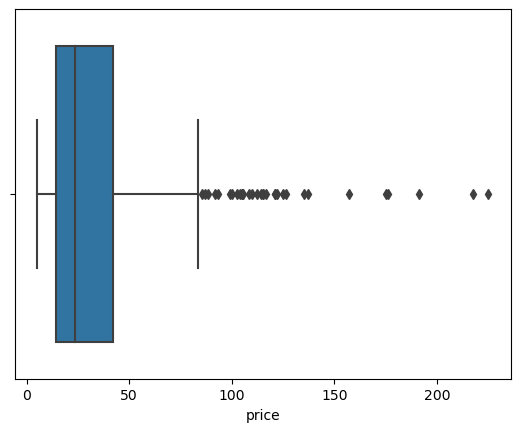

In [40]:
#Création d'un boxplot associé à la variable prix
sns.boxplot(table_total['price'])

On voit bien sur le boxplot le Q1, Q3 et la médiane, les valeurs au-dessus de Q3 sont considérées comme des outliers.

### Méthode interquartiles

In [41]:
#methode interquartiles
q1, q3 = np.percentile(table_total['price'] , [25,75])
print(q1, q3)

14.1 42.175000000000004


In [42]:
iqr = q3-q1
print(iqr)

28.075000000000003


In [43]:
#trouver le valeur min et la valeur max
val_min = q1 - (1.5*iqr)
val_max = q3 + (1.5*iqr)
print(val_min, val_max)

-28.012500000000003 84.28750000000001


In [44]:
#Affichage des valeurs abberrantes
outliers = []
for x in table_total['price']:
    if ((x>val_max) or (x<val_min)):
        outliers.append(x)
print("les outliers sont : ",outliers)

les outliers sont :  [100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


On peut constater avec ce calcul que la longeur de l'intervalle dans lequel la moitié centrale des valeurs est de -28 et 84,3.
Au moins 50% des valeurs sont comprises dans cette intervalle. 
La limite inférieure étant négative (-28), il est logique qu'aucune valeur aberrante ne soit négatives, un prix ne peut être négatif et notre prix minimal est de 5,2€.
La limite supérieure est de 84,3€ sachant que la valeur maximale est de 225€.
Les valeurs en dessous de val_min (q1-(1.5* irq)) et au dessus de val_max (q3 + (1.5 * irq )) seront pris en compte comme outliers. 

### Méthode Zscore

In [45]:
#Affichage colonne price pour comparer avec les écarts types de la méthode Zscore
table_total['price'].unique()

array([ 24.2 ,  34.3 ,  20.8 ,  14.1 ,  46.  ,  32.7 ,  31.2 ,  60.  ,
        42.6 ,  80.  ,  18.3 ,  22.8 ,  19.3 ,  21.8 ,   7.7 ,  33.7 ,
        44.3 ,  71.6 ,  12.7 ,   8.7 ,  11.9 ,  14.5 ,  14.4 ,  19.5 ,
        22.  ,  16.6 ,  23.4 ,  33.2 ,  32.  ,  77.8 ,  14.7 ,  14.05,
        22.9 ,  44.  ,  37.  ,  39.  ,  17.  ,  23.2 ,  19.  ,  16.4 ,
        13.7 ,  12.6 ,  12.8 ,  22.1 ,  15.8 ,  16.3 ,   9.7 ,   6.8 ,
        35.  ,  31.7 , 100.  ,  23.  ,  88.4 ,  29.8 ,  25.7 ,  77.4 ,
        53.  ,  49.  ,  29.5 ,  33.  ,  37.5 ,  69.  ,  59.  ,  19.2 ,
        29.  ,   9.8 ,  20.35,  12.  ,  18.5 ,   9.3 ,  11.6 ,  14.3 ,
        10.8 ,   7.6 ,  20.5 ,  18.2 ,   9.  ,   7.8 ,   5.7 ,  13.5 ,
        11.5 ,  24.  ,  16.7 ,  21.4 ,  13.3 ,   9.5 ,  12.1 ,  17.8 ,
        27.2 ,   9.4 ,   5.8 ,  38.  ,   9.9 ,  11.3 ,   6.7 ,  79.8 ,
        48.5 ,  39.8 ,  58.8 ,  26.5 ,  13.4 ,  17.1 ,   8.9 ,  17.2 ,
        16.9 ,  29.9 ,   9.6 ,  11.1 ,  28.  ,   8.6 ,  15.3 ,  14.8 ,
      

In [46]:
#Methode Zscore
stats.zscore(table_total['price']).unique()

array([-2.98410437e-01,  6.50160107e-02, -4.20752013e-01, -6.61836884e-01,
        4.86014964e-01,  7.44350421e-03, -4.65307206e-02,  9.89774396e-01,
        3.63673388e-01,  1.70943073e+00, -5.10709054e-01, -3.48786380e-01,
       -4.74726238e-01, -3.84769196e-01, -8.92126910e-01,  4.34263208e-02,
        4.24844176e-01,  1.40717507e+00, -7.12212827e-01, -8.56144093e-01,
       -7.40999080e-01, -6.47443757e-01, -6.51042039e-01, -4.67529674e-01,
       -3.77572633e-01, -5.71879842e-01, -3.27196690e-01,  2.54349125e-02,
       -1.77444674e-02,  1.63026853e+00, -6.40247194e-01, -6.63636025e-01,
       -3.45188098e-01,  4.14049331e-01,  1.62169615e-01,  2.34135249e-01,
       -5.57486716e-01, -3.34393253e-01, -4.85521083e-01, -5.79076406e-01,
       -6.76230010e-01, -7.15811109e-01, -7.08614545e-01, -3.73974351e-01,
       -6.00666096e-01, -5.82674687e-01, -8.20161277e-01, -9.24511445e-01,
        9.02039823e-02, -2.85393123e-02,  2.42908706e+00, -3.41589816e-01,
        2.01168639e+00, -

In [47]:
#fonction pour detecter les outliers
outliers = []
def detect_outliers(data): 
    threshold = 3
    mean = np.mean(table_total['price'])
    std = np.std(table_total['price'])
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers    

In [48]:
#Affichage des outliers
detect_outliers(table_total['price'])

[225.0,
 126.5,
 176.0,
 157.0,
 137.0,
 217.5,
 124.8,
 175.0,
 191.3,
 122.0,
 135.0,
 116.4,
 121.0,
 121.0]

La première valeur de "24,2" dans le tableau est à -0,3 écart-types en dessous de la moyenne.
La valeur "34,2" dans le tableau est à 0,06 écart-type de la moyenne, elle est quasi-égale à la moyenne de 32,5€
La valeur "69" dans le tableau est à 1,31 écart-type au-dessus de la moyenne.
Un score Z d'un point de donner est supérieur à 3, cela indique que le point de données est très différent des autres points de données, on peut alors suggérer que c'est une valeur aberrante.

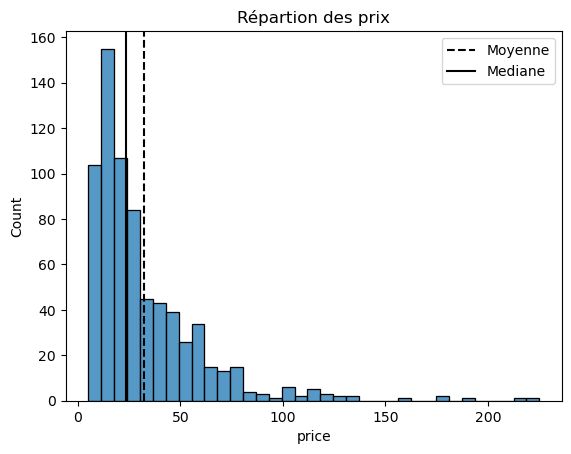

In [49]:
mean = table_total['price'].mean() #Calcul de la moyenne de la colonne price
median = table_total['price'].median() #Calcul de la médiane de la colonne price

sns.histplot(data = table_total['price'], kde=False)
plt.axvline(mean, color="black" ,linestyle="--")
plt.axvline(median, color="black", linestyle ="-")
plt.legend({"Moyenne":mean,"Mediane":median})
plt.title('Répartion des prix')
plt.show()

L'histogramme représente bien la répartition des prix, ce qui est attendu en minimum et en maximum, la moyenne et la médiane également. La médiane est plus vers la gauche sur le graphique donc dans notre boutique on peut voir que les prix bas sont plus fréquent que les prix élevés. 

Avec les méthodes zscore et interquatiles, on peut constater que le nombre de valeurs aberrantes est différent, et que ceux-ci sont beaucoup plus nombreux pour la méthode des interquatiles.

Pour cette méthode, les valeurs sont nombreuses et vont de 86 € à 175 € alors que la méthode zscore les prix sont de 116 € à 225 € (la valeur maximum trouvée auparavant), les deux méthodes ont des résultats différents, la méthode zscore est plus précise que la méthode interquatiles, mais celle ci contient plus de données.

Dans notre cas, on peut considérer que dans la vente de bouteille de vin, les valeurs trouvaient par les différentes méthodes ne sont pas forcément vrai, car il est possible de vendre une bouteille de vin à 5,20 € qui sera les bouteilles les moins chères du magasin, mais il est aussi possible d'en vendre à 225 € pour des bouteilles de meilleur qualité et haut de gamme.

In [50]:
#sku mal formaté, trouver avec regex par exemple.
txt = liaison['sku']
txt.str.contains('-')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
792     NaN
793     NaN
822    True
823    True
824     NaN
Name: sku, Length: 734, dtype: object

In [51]:
liaison['sku'].head(822)

0        15298
1        15296
2        15300
3        19814
4        19815
        ...   
792      15891
793      15887
822    13127-1
823    14680-1
824      16230
Name: sku, Length: 734, dtype: object

On peut constater avec la fonction utiliser précédemment que certains SKU sont mal formaté et qu'ils sont écris avec des tirets alors que tout les autres sont une suite de 5 chiffres.